### Import librairies
Nous importons les bibliothèque fondamentale pour la programme

In [277]:
import pandas as pd
import numpy as np

### Import donnée
Nous allons importer les données des trainSet et testSet dans les features et la variable à déviner

In [278]:
def importData(path):
    columnNames=["ECP","RC","MIN","MAX","MEAN","START","END","DURATION","CV","A1","A2","A3","A4","FP"]
    #columnNames=["RC","MIN","MAX","MEAN","START","END","DURATION","CV","A1","A2","A3","A4","FP"]
    delimit=','
    data = pd.read_csv(path, names=columnNames, sep=delimit)
    #data = data.drop(columns="ECP")
    return data

In [279]:
pathTrain='../2-TransformedData/export_2020-Jan-28-17_01_12.csv'
trainSet = importData(pathTrain)

trainSet.head(20)

,ECP,RC,MIN,MAX,MEAN,START,END,DURATION,CV,A1,A2,A3,A4,FP
0,245390003868,210,-67.0,-58.5,-61.957143,1579699702957564,1579699747867390,44909826,-0.020082,7,5,198,0,1
1,245390003869,174,-63.0,-56.5,-60.583333,1579699702975300,1579699745158768,42183468,-0.016437,0,0,173,1,1
2,300000000000000000017856,1,-63.5,-63.5,-63.500000,1579699733327556,1579699733327556,0,-0.000000,0,1,0,0,1
3,300000000000000000017857,304,-63.5,-56.0,-57.626645,1579699703039548,1579699747950958,44911410,-0.015811,0,2,1,301,1
4,300000000000000000017858,1,-57.5,-57.5,-57.500000,1579699717786689,1579699717786689,0,-0.000000,0,0,1,0,1
5,30000000000000000001785C,287,-58.5,-53.0,-54.932056,1579699702951407,1579699745675824,42724417,-0.017785,3,0,284,0,1
6,30000000000000000001785D,309,-64.5,-58.0,-61.085761,1579699703042235,1579699748151155,45108920,-0.014276,2,11,0,296,1
7,30000000000000000001785E,4,-60.0,-58.5,-59.500000,1579699713693963,1579699714336538,642575,-0.010292,4,0,0,0,0
8,300000000000000000017862,11,-60.5,-54.0,-57.000000,1579699710512550,1579699715069601,4557051,-0.036071,5,0,6,0,0
9,300000000000000000017863,18,-60.5,-52.5,-57.305556,1579699731195273,1579699733021167,1825894,-0.037713,0,10,0,8,0


### Import plot librairie
Il est temps de voir comment les élements X et FP sont liées les uns aux autres avec un graphe

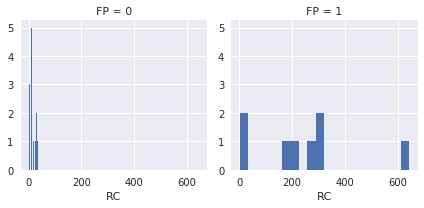

In [282]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

g = sns.FacetGrid(trainSet, col='FP')
g.map(plt.hist, 'RC', bins=20)

### Split Data
Nous allons découper les données d'apprentissage pour avoir la partie feature et y

In [283]:
features=trainSet.loc[:,'RC':'A4']
X = np.array(features).astype(int)
y = np.array(trainSet['FP'])

### Normalize Data
Nous allons 

In [284]:
from sklearn import preprocessing
X = preprocessing.normalize(X)

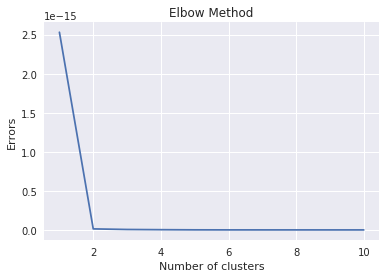

In [285]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

errors = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    errors.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Errors')
plt.show()

### Trainning
Nous allons 

In [286]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [287]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.9230769230769231


In [288]:
y_pred = kmeans.predict(X)
predict_data=trainSet
predict_data['IS_FP']=y_pred

predict_data.head(5)

,ECP,RC,MIN,MAX,MEAN,START,END,DURATION,CV,A1,A2,A3,A4,FP,IS_FP
0,245390003868,210,-67.0,-58.5,-61.957143,1579699702957564,1579699747867390,44909826,-0.020082,7,5,198,0,1,1
1,245390003869,174,-63.0,-56.5,-60.583333,1579699702975300,1579699745158768,42183468,-0.016437,0,0,173,1,1,1
2,300000000000000000017856,1,-63.5,-63.5,-63.500000,1579699733327556,1579699733327556,0,-0.000000,0,1,0,0,1,0
3,300000000000000000017857,304,-63.5,-56.0,-57.626645,1579699703039548,1579699747950958,44911410,-0.015811,0,2,1,301,1,1
4,300000000000000000017858,1,-57.5,-57.5,-57.500000,1579699717786689,1579699717786689,0,-0.000000,0,0,1,0,1,0


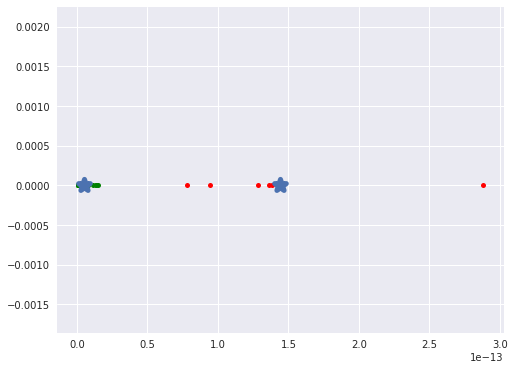

In [365]:
centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
for i in range(len(X)):
    #print(trainSet.iloc[i][1])
    plt.plot(X[i][0], X[i][7], colors[y_pred[i]], markersize = 10)
    

plt.scatter(centroids[:, 0],centroids[:, 1], marker = "*", s=150, linewidths = 5, zorder = 10)

plt.show()